In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.misc import imresize, imread
%matplotlib inline

# load the dataset

In [2]:
X = np.load('X.npy') # images
Y = np.load('Y.npy') # labels associated to images (0 = no cancer, 1 = cancer)

In [3]:
print('Total number of images : {}'.format(len(X)))
print('Number of images without cancer : {}'.format(np.sum(Y==0)))
print('Number of images with cancer : {}'.format(np.sum(Y==1)))
print('Percentage of positive images : {:.2f}%'.format(100*np.mean(Y)))

print('Image shape (number of rows, number of columns, channels RGB): {}'.format(X[0].shape))

Total number of images : 5547
Number of images without cancer : 2759
Number of images with cancer : 2788
Percentage of positive images : 50.26%
Image shape (number of rows, number of columns, channels RGB): (50, 50, 3)


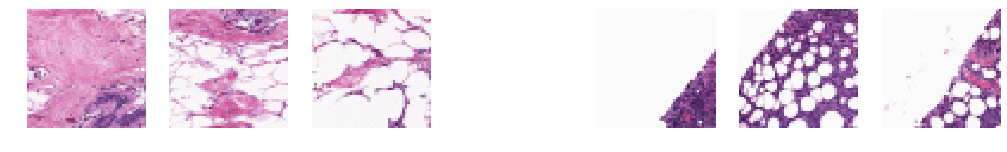

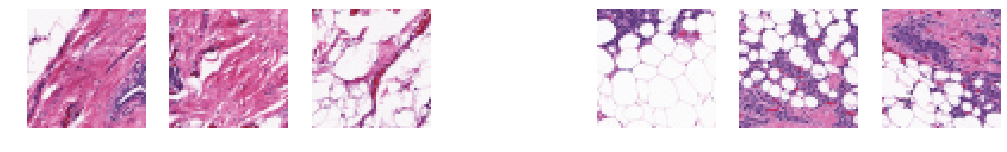

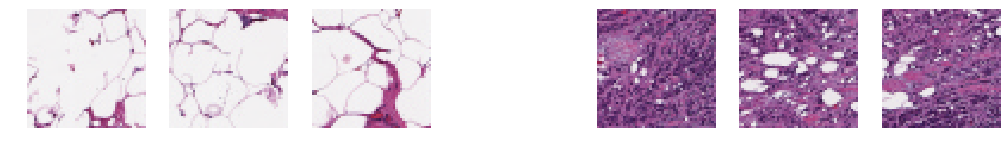

In [4]:
imgs0 = X[Y==0] # images with label 0 = no cancer, negative image
imgs1 = X[Y==1] # images with label 1 =    cancer, positive image

batch = 0 

for row in range(3):
    plt.figure(figsize=(20, 10))
    for col in range(3):
        plt.subplot(1,8,col+1)
        plt.imshow(imgs0[50*batch + 5*row+col])
        plt.axis('off')       
        plt.subplot(1,8,col+5)
        plt.imshow(imgs1[50*batch + 5*row+col])
        plt.axis('off')

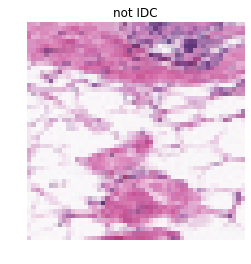

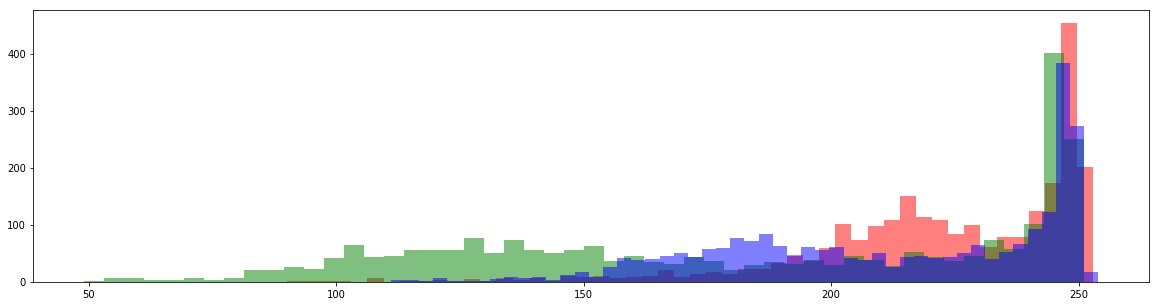

In [5]:
i= 1 
xi = X[i]

plt.imshow(xi)
plt.axis('off')
plt.title('IDC' if Y[i] else 'not IDC')

plt.figure(figsize=(20,5))
n_bins = 50
plt.hist(xi[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
plt.hist(xi[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
plt.hist(xi[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

X_train = X_train[0:3000] 
Y_train = Y_train[0:3000]
X_test = X_test[0:3000] 
Y_test = Y_test[0:3000]

# Normalize the data
X_train = X_train / 256.0
X_test = X_test / 256.0


print("Training Data Shape:", X_train.shape, X_train.shape)
print("Testing Data Shape:", X_test.shape, X_test.shape)

Training Data Shape: (3000, 50, 50, 3) (3000, 50, 50, 3)
Testing Data Shape: (1110, 50, 50, 3) (1110, 50, 50, 3)


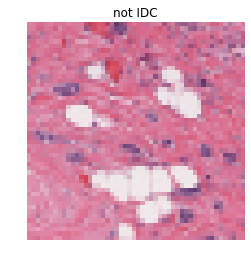

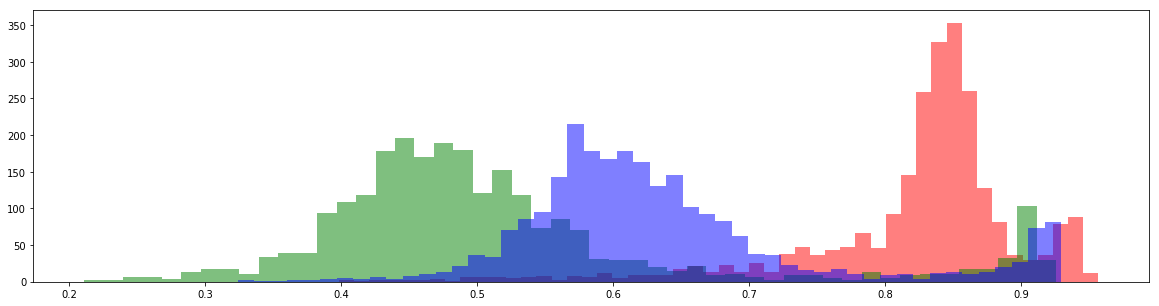

In [42]:
i=  1
xi = X_train[i]

plt.imshow(xi)
plt.axis('off')
plt.title('IDC' if Y[i] else 'not IDC')

plt.figure(figsize=(20,5))
n_bins = 50
plt.hist(xi[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
plt.hist(xi[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
plt.hist(xi[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);

In [8]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold




# Make Data 1D for compatability with standard classifiers

X_trainShape = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_testShape = X_test.shape[1]*X_test.shape[2]*X_test.shape[3]

X_train = X_train.reshape(X_train.shape[0], X_trainShape)
X_test = X_test.reshape(X_test.shape[0], X_testShape)

In [9]:
#runLogisticRegression
def runLogisticRegression(a,b,c,d):
    """Run LogisticRegression w/ Kfold CV"""
    model = LogisticRegression()
    model.fit(a,b)
    kfold = model_selection.KFold(n_splits=10)
    accuracy = model_selection.cross_val_score(model, c,d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    print('LogisticRegression - Training set accuracy: %s (%s)' % (mean, stdev))
    print('')
runLogisticRegression(X_train, Y_train, X_test, Y_test)

c:\users\pbonam\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\pbonam\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\pbonam\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\pbonam\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\pbonam\appdata\local\programs\python\python37\l

LogisticRegression - Training set accuracy: 0.6981981981981982 (0.04668196903795176)



# Compare Performance of Classification Algorithms


Compare Multiple Classifiers:

K-Fold Cross-Validation Accuracy:



c:\users\pbonam\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\pbonam\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\pbonam\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\pbonam\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\pbonam\appdata\local\programs\python\python37\l

LR: 0.698198 (0.046682)


c:\users\pbonam\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF: 0.740541 (0.041831)
KNN: 0.740541 (0.040651)


c:\users\pbonam\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\pbonam\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\pbonam\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", Futu

SVM: 0.750450 (0.049188)


c:\users\pbonam\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\pbonam\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\pbonam\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\pbonam\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\pbonam\appdata\local\programs\python\python37\lib\site-

LSVM: 0.676577 (0.041176)
GNB: 0.728829 (0.044218)
DTC: 0.673874 (0.029552)


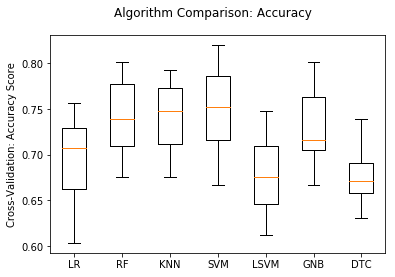

In [10]:
def compareABunchOfDifferentModelsAccuracy(a,b,c,d):
      
    print('')
    print('Compare Multiple Classifiers:')
    print('')
    print('K-Fold Cross-Validation Accuracy:')
    print('')
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('SVM', SVC()))
    models.append(('LSVM', LinearSVC()))
    models.append(('GNB', GaussianNB()))
    models.append(('DTC', DecisionTreeClassifier()))     
    resultsAccuracy = []
    names = []
    for name, model in models:
        model.fit(a, b)
        kfold = model_selection.KFold(n_splits=10)
        accuracy_results = model_selection.cross_val_score(model, c, d, cv=kfold, scoring='accuracy')
        resultsAccuracy.append(accuracy_results)
        names.append(name)
        accuracyMessage = "%s: %f (%f)" % (name, accuracy_results.mean(), accuracy_results.std())
        print(accuracyMessage)  
    # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison: Accuracy')
    ax = fig.add_subplot(111)
    plt.boxplot(resultsAccuracy)
    ax.set_xticklabels(names)
    ax.set_ylabel('Cross-Validation: Accuracy Score')
    plt.show()
    return
compareABunchOfDifferentModelsAccuracy(X_train, Y_train, X_test, Y_test)


In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
def defineModels():
    print('')
    print('LR = LogisticRegression')
    print('RF = RandomForestClassifier')
    print('KNN = KNeighborsClassifier')
    print('SVM = Support Vector Machine SVC')
    print('LSVM = LinearSVC')
    print('GNB = GaussianNB')
    print('DTC = DecisionTreeClassifier')
    print('')
    return
defineModels()


LR = LogisticRegression
RF = RandomForestClassifier
KNN = KNeighborsClassifier
SVM = Support Vector Machine SVC
LSVM = LinearSVC
GNB = GaussianNB
DTC = DecisionTreeClassifier



# spliting the training andd test data

In [13]:
X = np.load('X.npy') 
Y = np.load('Y.npy')
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

X_train = X_train[0:3000] 
Y_train = Y_train[0:3000]
X_test = X_test[0:3000] 
Y_test = Y_test[0:3000]

X_train = X_train / 256.0
X_test = X_test / 256.0

print("Training Data Shape:", X_train.shape, X_train.shape)
print("Testing Data Shape:", X_test.shape, X_test.shape)

Training Data Shape: (3000, 50, 50, 3) (3000, 50, 50, 3)
Testing Data Shape: (1110, 50, 50, 3) (1110, 50, 50, 3)


In [15]:
import keras
from keras.models import Sequential
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.layers import Dense, Activation, Dropout
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.models import model_from_json


Y_train = to_categorical(Y_train, num_classes = 2)
Y_test = to_categorical(Y_test, num_classes = 2)


Using TensorFlow backend.


# CNN Model 1

In [16]:
import sklearn
from keras import backend as K
from keras.layers import Conv2D, MaxPooling2D
def runKerasCNN(a,b,c,d):


    batch_size = 128
    num_classes = 2
    epochs = 12
    
    
    img_rows, img_cols = X_train.shape[1],X_train.shape[2]
    input_shape = (img_rows, img_cols, 3)
    x_train = a
    y_train = b
    x_test = c
    y_test = d
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    
    model.fit(x_train, y_train,
              batch_size=batch_size,
              verbose=1,
              epochs=epochs,
              validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    
    
    print('')
    print('Keras CNN #1A - accuracy:', score[1])
    print('')

    y_pred = model.predict(c)
    
    map_characters = {0: 'benign', 1: 'malignant'}
    print('\n', sklearn.metrics.classification_report(np.where(d > 0)[1], np.argmax(y_pred, axis=1), target_names=list(map_characters.values())), sep='')    

runKerasCNN(X_train, Y_train,  X_test, Y_test)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 3000 samples, validate on 1110 samples
Epoch 1/12
3000/3000 [==============================] - 49s 16ms/step - loss: 0.9254 - acc: 0.5083 - val_loss: 0.6865 - val_acc: 0.4991
Epoch 2/12
3000/3000 [==============================] - 47s 16ms/step - loss: 0.6811 - acc: 0.5687 - val_loss: 0.8675 - val_acc: 0.5144
Epoch 3/12
3000/3000 [==============================] - 47s 16ms/step - loss: 0.6738 - acc: 0.6107 - val_loss: 0.6736 - val_acc: 0.5234
Epoch 4/12
3000/3000 [==============================] - 47s 16ms/step - loss: 0.6487 - acc: 0.6453 - val_loss: 0.6875 - val_acc: 0.5721
Epoch 5/12
3000/3000 [==============================] - 47s 16ms/step - loss: 0.6635 - acc: 0.6333 - val_loss: 0.6249 - val_acc: 0.7117
Epoch 6/12
3000/3000 [===============

# CNN Model 2 with RMSprop Optimizer 

In [17]:
def runAnotherKeras(a, b,c,d):

    # CNN architechture  -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out
    
    batch_size = 128
    num_classes = 2
    epochs = 12
        
    img_rows, img_cols = X_train.shape[1],X_train.shape[2]
    input_shape = (img_rows, img_cols, 3)
    model = Sequential()
    
    model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu', input_shape = input_shape))
    model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters = 86, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(Conv2D(filters = 86, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation = "softmax"))
    

    optimizer = RMSprop(lr=0.001, decay=1e-6)
    
    model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
    
    model.fit(a,b,
                  batch_size=batch_size,
                  verbose=1,
                  epochs=epochs,
                  validation_data=(c,d))
    score = model.evaluate(c,d, verbose=0)
    print('')
    print('Keras CNN #2 - accuracy:', score[1])
    print('')

    y_pred = model.predict(c)
    
    map_characters = {0: 'benign', 1: 'malignant'}
    print('\n', sklearn.metrics.classification_report(np.where(d > 0)[1], np.argmax(y_pred, axis=1), target_names=list(map_characters.values())), sep='')    


runAnotherKeras(X_train, Y_train, X_test, Y_test)

Train on 3000 samples, validate on 1110 samples
Epoch 1/12
3000/3000 [==============================] - 94s 31ms/step - loss: 2.0477 - acc: 0.6293 - val_loss: 0.6747 - val_acc: 0.5820
Epoch 2/12
3000/3000 [==============================] - 93s 31ms/step - loss: 0.5838 - acc: 0.7240 - val_loss: 1.9217 - val_acc: 0.6459
Epoch 3/12
3000/3000 [==============================] - 93s 31ms/step - loss: 0.5612 - acc: 0.7550 - val_loss: 5.4658 - val_acc: 0.4991
Epoch 4/12
3000/3000 [==============================] - 92s 31ms/step - loss: 0.5469 - acc: 0.7537 - val_loss: 3.3421 - val_acc: 0.5018
Epoch 5/12
3000/3000 [==============================] - 92s 31ms/step - loss: 0.5273 - acc: 0.7700 - val_loss: 5.0259 - val_acc: 0.5054
Epoch 6/12
3000/3000 [==============================] - 92s 31ms/step - loss: 0.5055 - acc: 0.7643 - val_loss: 6.7094 - val_acc: 0.4874
Epoch 7/12
3000/3000 [==============================] - 94s 31ms/step - loss: 0.5122 - acc: 0.7747 - val_loss: 2.2890 - val_acc: 0.6135


# Model 3 with Data Augmentation and Optimizer

Epoch 1/16
94/93 [==============================] - 94s 1s/step - loss: 1.3717 - acc: 0.6897
Epoch 2/16
94/93 [==============================] - 88s 938ms/step - loss: 0.6176 - acc: 0.7091
Epoch 3/16
94/93 [==============================] - 88s 932ms/step - loss: 0.5976 - acc: 0.7358
Epoch 4/16
94/93 [==============================] - 89s 945ms/step - loss: 0.5482 - acc: 0.7481
Epoch 5/16
94/93 [==============================] - 89s 946ms/step - loss: 0.5530 - acc: 0.7544
Epoch 6/16
94/93 [==============================] - 89s 945ms/step - loss: 0.5377 - acc: 0.7613
Epoch 7/16
94/93 [==============================] - 89s 944ms/step - loss: 0.5299 - acc: 0.7714
Epoch 8/16
94/93 [==============================] - 88s 937ms/step - loss: 0.5379 - acc: 0.7623
Epoch 9/16
94/93 [==============================] - 88s 939ms/step - loss: 0.5287 - acc: 0.7696
Epoch 10/16
94/93 [==============================] - 88s 940ms/step - loss: 0.5306 - acc: 0.7684
Epoch 11/16
94/93 [=======================

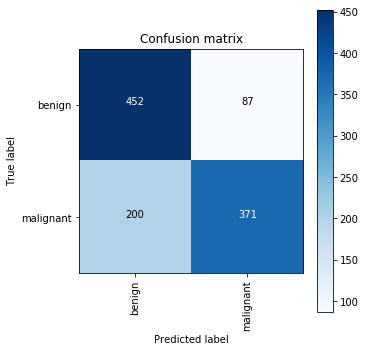

In [44]:
#confusion matrix 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    



def runAnotherKerasAugmentedConfusion(a, b,c,d):

    # CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out
    
    batch_size = 128
    num_classes = 2
    epochs = 16
        
    # input image dimensions
    img_rows, img_cols = X_train.shape[1],X_train.shape[2]
    input_shape = (img_rows, img_cols, 3)
    
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu', input_shape = input_shape))
    model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters = 86, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(Conv2D(filters = 86, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation = "softmax"))
    
    # Define the optimizer
    optimizer = RMSprop(lr=0.001, decay=1e-6)
    
    model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


    # Normalization
    # (std, mean, and principal components if ZCA whitening is applied)
    datagen.fit(a)

    # fits the model on batches with real-time data augmentation:
    model.fit_generator(datagen.flow(a,b, batch_size=32),
                        steps_per_epoch=len(a) / 32, epochs=epochs)


    score = model.evaluate(c,d, verbose=0)
        
    print('')
    print('Keras CNN #2B - accuracy:', score[1])
    print('')

    y_pred = model.predict(c)
    
    map_characters = {0: 'benign', 1: 'malignant'}
    dict_characters = map_characters
    print('\n', sklearn.metrics.classification_report(np.where(d > 0)[1], np.argmax(y_pred, axis=1), target_names=list(map_characters.values())), sep='')    
   

    # Predict the values from the validation dataset
    Y_pred = model.predict(X_test)
    # Convert hot vectors prediction results to list of classes
    Y_pred_classes = np.argmax(Y_pred,axis = 1) 
    # Convert hot vectors validation observations to list of classes
    Y_true = np.argmax(Y_test,axis = 1) 
    # compute the confusion matrix
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
    # plot the confusion matrix
    plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 

runAnotherKerasAugmentedConfusion(X_train, Y_train, X_test, Y_test)